In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
#todays date and time
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-07-10
time: 19:24:21


In [3]:
prompt1 = "Simulate pdb  1MBN at two different temperatures: 300K, 400K for 1ns seconds each. Plot RMSD of both over time, and compare the final secondary structures at the end of the simulations."
llm_var = "gpt-3.5-turbo-0125"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)

In [4]:
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

LLM:  gpt-3.5-turbo-0125 
Temperature:  0.1


In [5]:
agent.run(prompt1)

Thought: To simulate the protein 1MBN at different temperatures and compare the RMSD and secondary structures, I need to set up and run the simulation with specific parameters for each temperature.

Action: SetUpandRunFunction
Action Input:
```
{
  "pdb_id": "1MBN",
  "forcefield_files": ["amber14/protein.ff14SB.xml", "amber14/tip3p.xml"],
  "save": true,
  "system_params": {
    "nonbondedMethod": "NoCutoff",
    "constraints": "HBonds",
    "rigidWater": true
  },
  "integrator_params": {
    "integrator_type": "LangevinMiddle",
    "Temperature": "300 * kelvin",
    "Friction": "1.0 / picoseconds",
    "Timestep": "0.002 * picoseconds"
  },
  "simulation_params": {
    "Ensemble": "NVT",
    "Number of Steps": 500000,
    "record_interval_steps": 100,
    "record_params": ["step", "potentialEnergy", "temperature"]
  }
}
```--------------
Completion:
--------------
Thought: To simulate the protein 1MBN at different temperatures and compare the RMSD and secondary structures, I need to

2024-07-10 19:24:37.751 
  command:

    streamlit run /Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


PDB file found with this ID: 1MBN
Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1MBN_192438",
    "forcefield_files": ["amber14/protein.ff14SB.xml", "amber14/tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds"
    },
    "simulation_params": {
      "Ensemble": "NVT",
      "Number of Steps": 500000,
      "record_interval_steps": 100,
      "record_params": ["step", "potentialEnergy", "temperature"]
    }
  }
}
```Building system...
About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: VAL
Residue code not in solvent list. Adding forcefiel

('The simulations for protein 1MBN at temperatures 300K and 400K have been successfully completed. The RMSD analysis shows the comparison over time, with the RMSD values saved in the file rmsd_1MBN. The secondary structure analysis using DSSP reveals the following distribution:\n- At 300K: Helix - 505,414, Strand - 0, Coil - 261,116\n- At 400K: Helix - 505,397, Strand - 712, Coil - 260,421\n\nThe final secondary structures at the end of the simulations differ slightly, with a notable increase in strands at 400K compared to 300K.',
 'BWZFS21S')

In [6]:
#print final date and time
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-07-10
time: 20:07:30


In [7]:
registry = agent.path_registry
print(registry.list_path_names_and_descriptions())

Files found in registry: 1MBN_192438: PDB file downloaded from RSCB, PDBFile ID: 1MBN_192438, 1MBN_192447: Cleaned File:  Removed Heterogens, and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. , top_sim0_192450: Initial positions for simulation sim0_192450, sim0_192450: Basic Simulation of Protein 1MBN_192447, rec0_192450: Simulation trajectory for protein 1MBN_192447 and simulation sim0_192450, rec1_192450: Simulation state log for protein 1MBN_192447 and simulation sim0_192450, rec2_192450: Simulation pdb frames for protein 1MBN_192447 and simulation sim0_192450, top_sim0_194650: Initial positions for simulation sim0_194650, sim0_194650: Basic Simulation of Protein 1MBN_192447, rec0_194650: Simulation trajectory for protein 1MBN_192447 and simulation sim0_194650, rec1_194650: Simulation state log for protein 1MBN_192447 and simulation sim0_194650, rec2_194650: Simulation pdb frames for protein 1MBN_1924

In [9]:
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1MBN_192438: PDB file downloaded from RSCB
 PDBFile ID: 1MBN_192438
 1MBN_192447: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_192450: Initial positions for simulation sim0_192450
 sim0_192450: Basic Simulation of Protein 1MBN_192447
 rec0_192450: Simulation trajectory for protein 1MBN_192447 and simulation sim0_192450
 rec1_192450: Simulation state log for protein 1MBN_192447 and simulation sim0_192450
 rec2_192450: Simulation pdb frames for protein 1MBN_192447 and simulation sim0_192450
 top_sim0_194650: Initial positions for simulation sim0_194650
 sim0_194650: Basic Simulation of Protein 1MBN_192447
 rec0_194650: Simulation trajectory for protein 1MBN_192447 and simulation sim0_194650
 rec1_194650: Simulation state log for protein 1MBN_192447 and simulation sim0_194650
 rec2_194650: Simulation pdb frames for protein 1MBN_1924

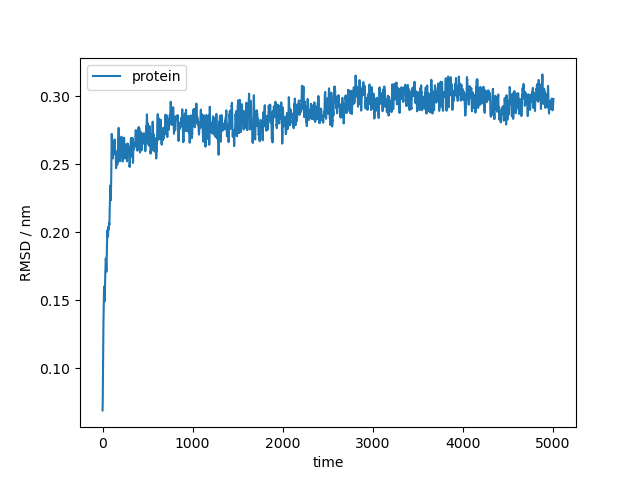

In [11]:
#plotting rmsd of both simulations
from IPython.display import Image
rmsd1ID = 'fig0_200719'
#rmsd2ID = 'fig0_165231'
path1 = registry.get_mapped_path(rmsd1ID)
#path2 = registry.get_mapped_path(rmsd2ID)

Image(filename=path1)




In [12]:
import mdtraj as md
import numpy as np

traj_path_1 = registry.get_mapped_path("rec2_192450")
top_path_1 = registry.get_mapped_path("top_sim0_192450")
traj_1 = md.load(traj_path_1, top=top_path_1)

traj_path_2 = registry.get_mapped_path("rec2_194650")
top_path_2 = registry.get_mapped_path("top_sim0_194650")
traj_2 = md.load(traj_path_2, top=top_path_2)


# Compute the secondary structure of the trajectory
dssp_300 = md.compute_dssp(traj_1, simplified=True)
dssp_400 = md.compute_dssp(traj_2, simplified=True)

print("Number of sheets 300K: ",len([i for i in dssp_300.flatten() if i == 'E' ])/100)
print("Number of helices 300K: ",len([i for i in dssp_300.flatten() if i == 'H'])/100)
print("Number of coils 300K: ",len([i for i in dssp_300.flatten() if i == 'C'])/100)

print("Number of sheets 400K: ",len([i for i in dssp_400.flatten() if i == 'E'])/100)
print("Number of helices 400K: ",len([i for i in dssp_400.flatten() if i == 'H'])/100)
print("Number of coils: 400k",len([i for i in dssp_400.flatten() if i == 'C'])/100)


print("Agent response: ", "At 300K, there were 505,414 helices, 0 strands, and 261,116 coils. At 400K, there were 505,397 helices, 712 strands, and 260,421 coils.")

Number of sheets 300K:  0.0
Number of helices 300K:  5053.92


TypeError: 'builtin_function_or_method' object is not iterable

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ❌
### Logic make sense ❌
### Correct Answer  ❌